# Unsupervised Learning

![Unsupervised_Learning](Unsupervised_Learning.png)

### Introduction to Unsupervised Learning

#### What is Unsupervised Learning?

Unsupervised learning is a branch of machine learning where models are trained without labeled data. The goal is to find hidden patterns or intrinsic structures within a dataset, allowing the model to learn independently and extract meaningful insights.

#### Features and Applications:

- **Cluster Analysis:** Identifying groups with similar features, such as market segmentation.
- **Dimensionality Reduction:** Simplifying datasets by reducing the number of variables.
- **Anomaly Detection:** Recognizing unusual patterns or outliers.

#### When to Use Unsupervised Learning:

- When dealing with unlabeled data.
- When exploring data to identify underlying patterns or structures.
- For pre-processing data before supervised learning algorithms.


#### Mall Customer Market Segmentation: An Exploration of Unlabeled Data With The Help of Unsupervised Learning

In this notebook we will explore the dataset entitled ***Mall Customer Segmentation Data*** obtained from [Kaggle.com](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data). The objective of this dataset is to segmentate customers according to their spending patterns into categories useful for marketing purposes. 


---


#### Data Exploration


Before diving into unsupervised learning algorithms, it's crucial to explore and understand the dataset at hand. We'll look at the dataset's structure, descriptive statistics, distribution of variables, and correlations to gain insights and prepare the data for clustering algorithms.


In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
#Drop the CustomerID column as it does not provide any insight to our analysis
df.drop('CustomerID', axis=1, inplace=True)

# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [42]:
# Display descriptive statistics
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Data Visualization

We'll visualize the distributions and relationships between different variables.

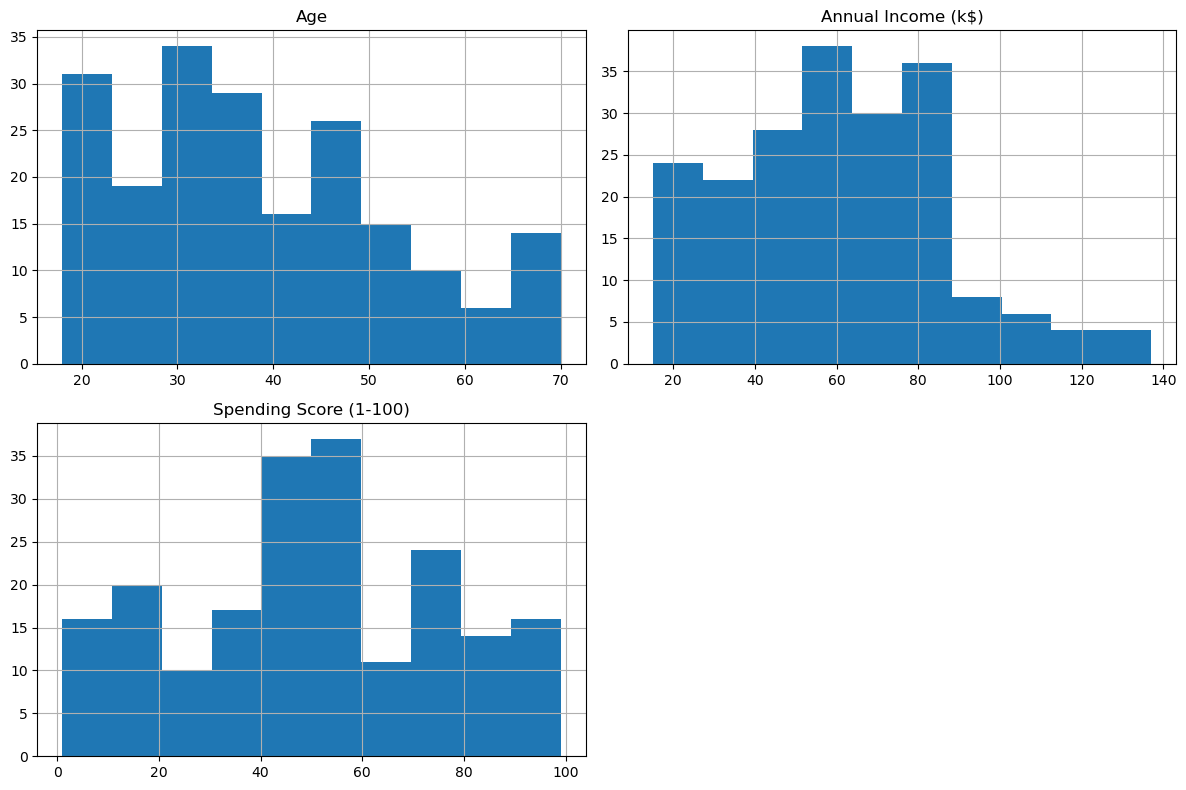

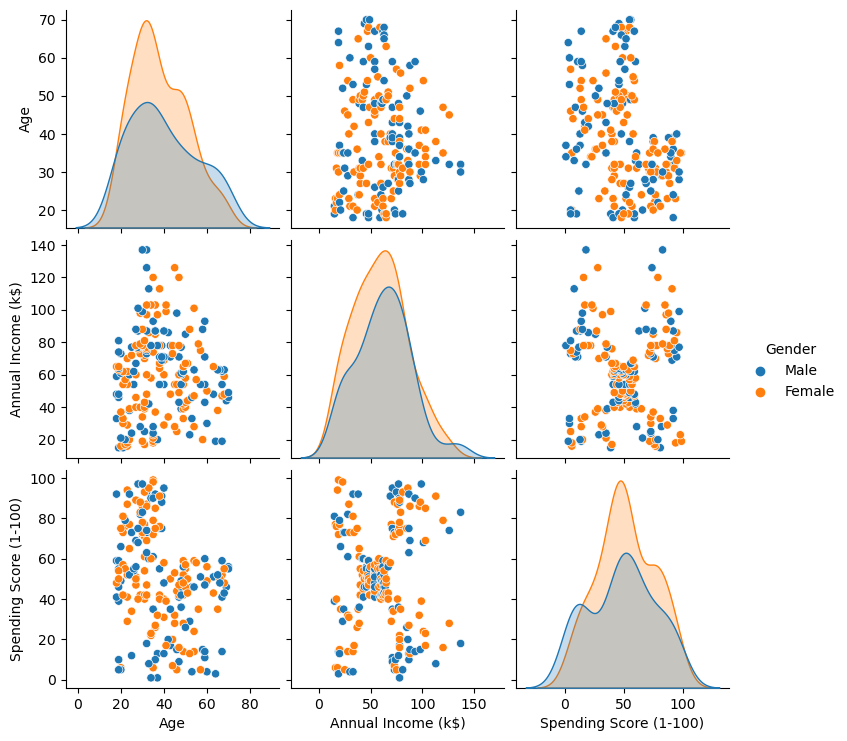

In [43]:
# Distribution of numerical features
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Pair plot to visualize relationships
sns.pairplot(df, hue='Gender') # Gender is used as a hue for clarity
plt.show()

### K-Means Clustering:

K-Means is a popular and widely used unsupervised clustering algorithm. It partitions a dataset into a specified number of clusters based on minimizing the variance within each cluster.

#### 1. Mechanics of the Algorithm:

1. **Initialization:** The algorithm begins by randomly selecting "K" initial centroids. These centroids represent the center points of the clusters to be formed.

2. **Assignment:** Each data point in the dataset is assigned to the nearest centroid based on a distance metric, typically the Euclidean distance. This assignment groups the dataset into "K" clusters.

3. **Update:** After all points are assigned, the centroids of each cluster are recalculated by taking the average of all points assigned to the cluster.

4. **Iterate:** The assignment and update steps are repeated iteratively until one of the following conditions is met:
   - The assignments no longer change between iterations.
   - The centroids do not move significantly.
   - A specified number of iterations is reached.

#### 2. Objective Function:

K-Means aims to minimize the sum of squared distances between each point and its assigned centroid. The objective function can be written as follows:

$$ J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2 $$

Where:
- $K$ is the number of clusters.
- $C_i$ denotes the set of data points assigned to cluster $i$.
- $\mu_i$ represents the centroid of cluster $i$.
- $\|x - \mu_i\|^2$ is the squared distance between point $x$ and its assigned centroid $\mu_i$.

#### 3. Advantages:

1. **Simplicity:** K-Means is easy to understand and implement, making it a popular choice for introductory and practical purposes.

2. **Efficiency:** The algorithm can handle large datasets efficiently with its O(nkd) time complexity ($n$: number of data points, $k$: number of clusters, $d$: dimensionality of the data).

3. **Interpretability:** The results are straightforward to interpret, providing clear centroids and clusters.

#### 4. Limitations:

1. **Specifying K:** The algorithm requires specifying the number of clusters in advance, which can be challenging without prior knowledge of the dataset.

2. **Sensitive to Initialization:** The initial choice of centroids can significantly impact the results. This can be mitigated by techniques such as k-means++ initialization, which spreads initial centroids more evenly.

3. **Cluster Shapes:** K-Means assumes clusters are spherical and isotropic, which limits its effectiveness on datasets with varied cluster shapes and densities.

4. **Handling Outliers:** K-Means does not inherently handle outliers, which can skew cluster centroids and assignments.

#### 5. Practical Usage:

1. **Choosing K:** To choose the number of clusters, methods like the Elbow Method or the Silhouette Score can be employed to find an optimal K based on the data's structure.

2. **Applications:**
   - **Market Segmentation:** Segmenting customers based on purchase history or behavior.
   - **Image Compression:** Reducing image size by clustering pixel colors.
   - **Document Classification:** Grouping text documents based on content similarity.

In summary, K-Means is a fundamental and efficient clustering algorithm with diverse applications. While it has some limitations, careful initialization, evaluation, and understanding of its assumptions can ensure effective usage.


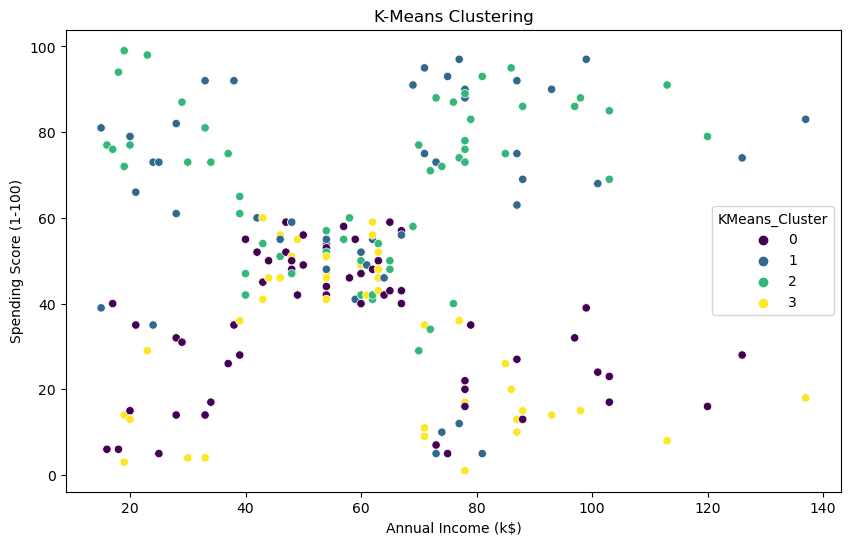

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Preprocessing
df['Gender'] = df['Gender']. apply(lambda x: 1 if x == 'Male' else 0)
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()


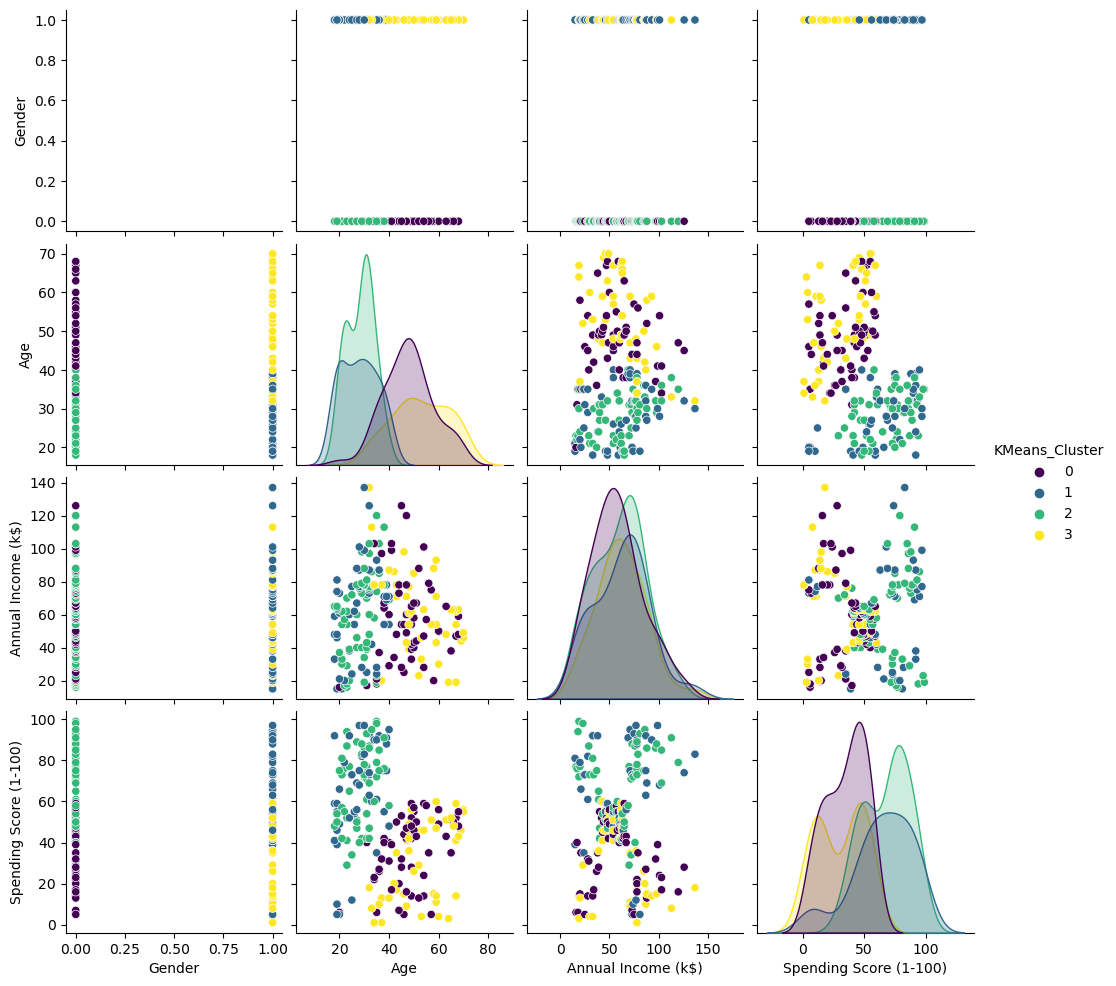

In [45]:
# Pair Plot for K-Means Clustering
sns.pairplot(df, hue='KMeans_Cluster', palette='viridis')
plt.show()

#### The Elbow Method
The Elbow Method is a simple yet effective technique to find the optimal number of clusters (K) in K-Means clustering. It involves the following steps:

1. Run K-Means: The K-Means algorithm is run multiple times with different values of K (usually starting from 1 and going up to a reasonable number).
2. Calculate Within-Cluster Sum of Squares (WCSS): For each value of K, the sum of squared distances between each data point and its assigned centroid (known as WCSS) is calculated. This measures the compactness of each cluster and the overall fit.
3. Plot WCSS vs. K: The values of K are plotted against their corresponding WCSS. The plot typically shows a sharp decline at first, which slows down as K increases.
4. Finding the "Elbow": The "elbow point" on the plot represents a balance between reducing WCSS and keeping K manageable. It's the point where the rate of decrease of WCSS slows down significantly, resembling an elbow on the plot.
5. Select K: The value of K at the elbow point is considered optimal, as it provides a good balance between the number of clusters and their compactness.

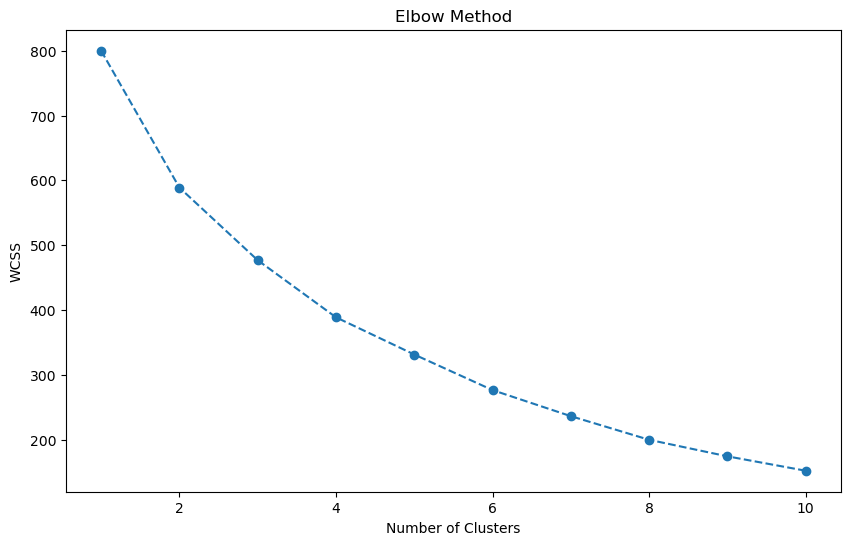

In [46]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Let's use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

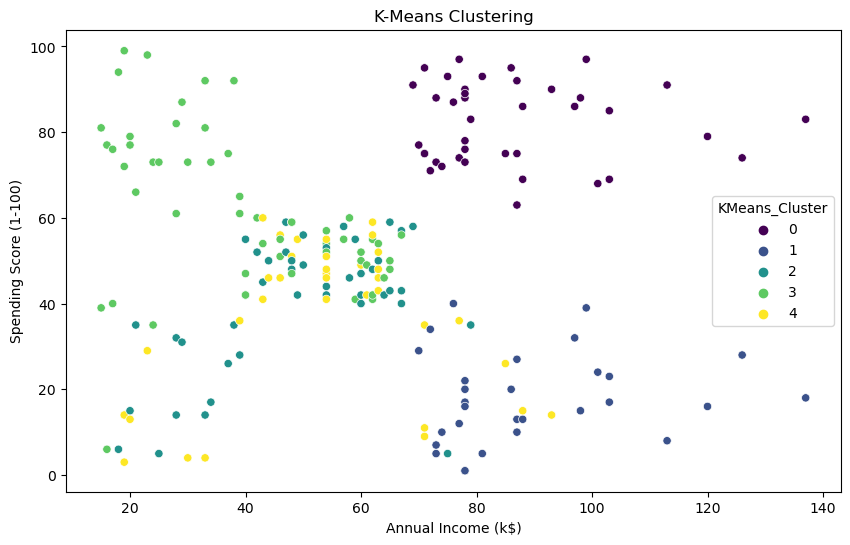

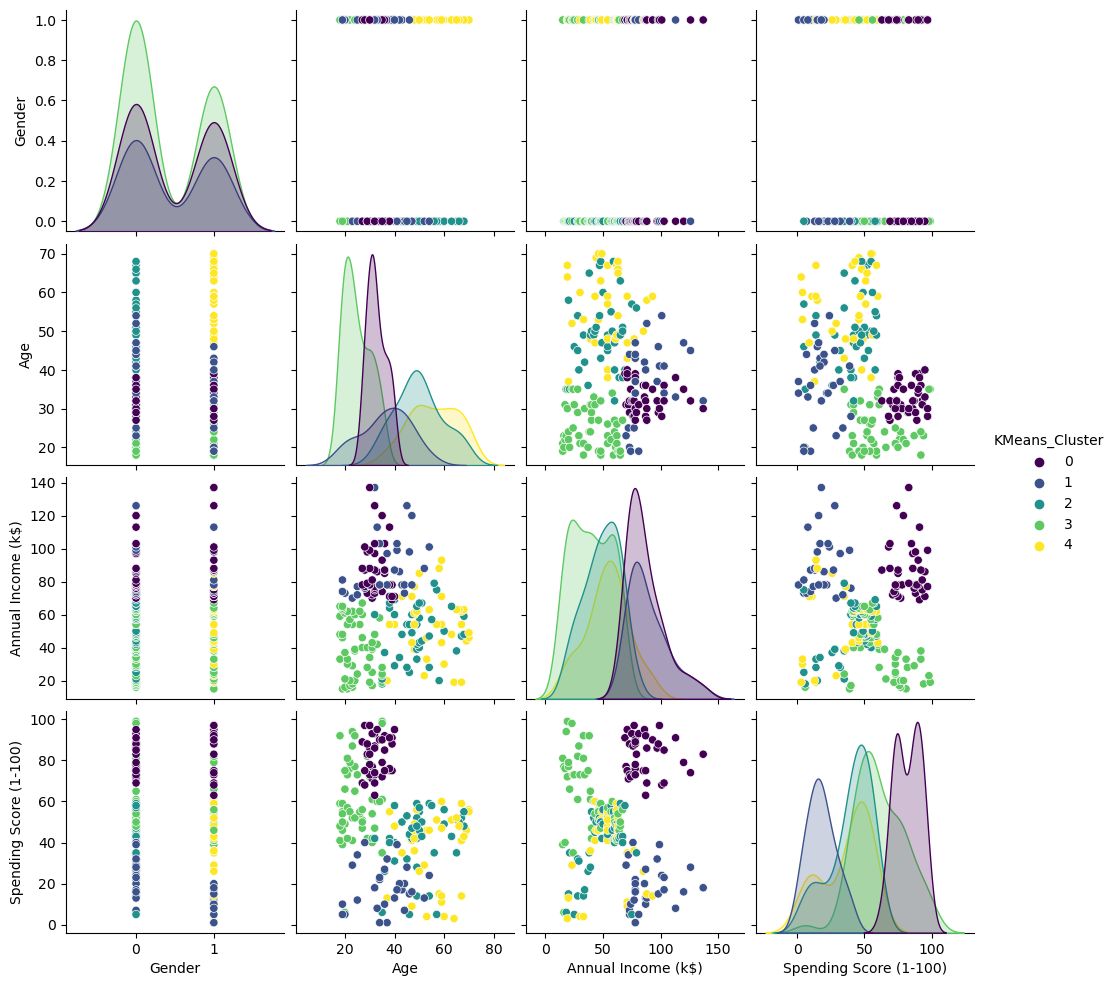

In [47]:
# The best k according to the elbow method is 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Pair Plot for K-Means Clustering
sns.pairplot(df, hue='KMeans_Cluster', palette='viridis')
plt.show()



Seeing the Data lke this provides useful insight. There is 5 distinct groups that could be classified in many ways but this one seems to be the most useful for our purposes using spending score and annual income:
0. Low income - low spending
1. Low income - high spending
2. average income - average spending
3. high income - low spending
4. high income - high spending

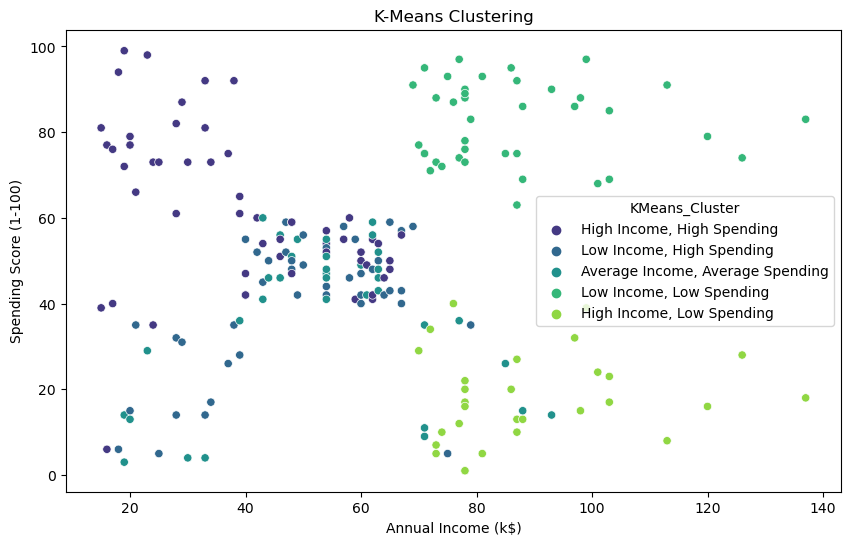

In [48]:
# Let's rename the clusters for better understanding
cluster_names = {
    0: 'Low Income, Low Spending',
    1: 'High Income, Low Spending',
    2: 'Low Income, High Spending',
    3: 'High Income, High Spending',
    4: 'Average Income, Average Spending'
}

df['KMeans_Cluster'] = df['KMeans_Cluster'].map(cluster_names)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()


# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points into clusters based on density. It identifies areas of high data density and separates them from areas with low data density, treating the latter as noise.

### Algorithm Overview:

1. **Parameter Setup:** DBSCAN requires two main parameters:
   - $\epsilon$: A distance threshold defining the radius around a point to consider its neighbors.
   - `MinPts`: The minimum number of points required to form a dense region (cluster).

2. **Core Points and Border Points:**
   - A point `p` is considered a *core point* if at least `MinPts` other points are within a distance of $\epsilon$ from `p`.
   - A point `q` is considered a *border point* if it lies within a distance of $\epsilon$ from a core point `p` but does not itself have enough neighbors to be a core point.

3. **Cluster Formation:**
   - The algorithm starts with an arbitrary point and explores its $\epsilon$-neighborhood.
   - If this neighborhood contains at least `MinPts` points, a new cluster is started, and all its points are recursively added to the cluster by exploring their $\epsilon$-neighborhoods.
   - This process continues until no new points can be added to the cluster.
   - The algorithm then searches for unvisited points to start a new cluster or ends if no more points are left to explore.

4. **Noise:**
   - Points that do not belong to any cluster (i.e., neither core nor border points) are labeled as noise.

### Formulation of $N_\epsilon$:

The $\epsilon$-neighborhood of a point `p`, denoted as $N_\epsilon(v)$, is defined as:

$$
N_\epsilon(v) = \{w \mid d(v, w) \leq \epsilon\}
$$

Where $d(p, q)$ represents the distance between points $p$ and $q$.

### Advantages of DBSCAN:
- **Automatic Noise Detection:** Points that don't fit into any cluster are automatically treated as noise.
- **No Predefined Number of Clusters:** DBSCAN does not require specifying the number of clusters in advance.
- **Arbitrary Cluster Shapes:** The algorithm can identify clusters of arbitrary shapes, making it robust to various data distributions.

### Disadvantages of DBSCAN:
- **Parameter Sensitivity:** The results can be highly dependent on the choice of $\epsilon$ and `MinPts`.
- **Varied Density:** DBSCAN struggles with datasets with clusters of varying densities.


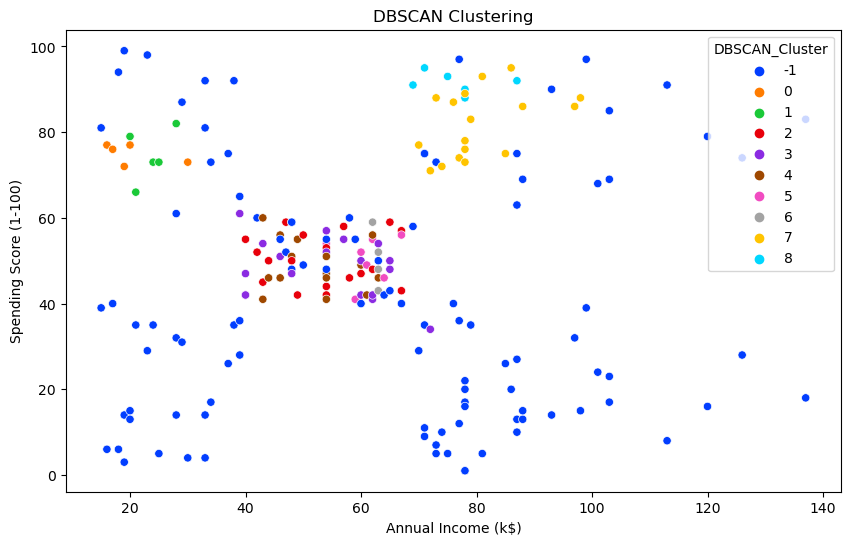

In [69]:
from sklearn.cluster import DBSCAN

#Let's try now DBSCAN clustering on the same two features Spending Score and Annual Income
dbscan = DBSCAN(eps=.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='DBSCAN_Cluster', palette='bright')
plt.title('DBSCAN Clustering')
plt.show()



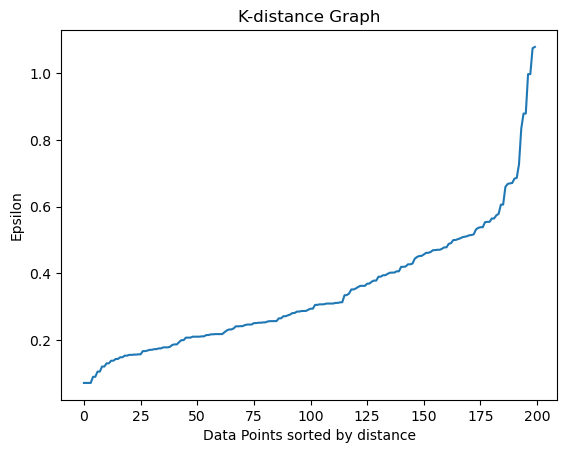

In [55]:
#Finding best eps value
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

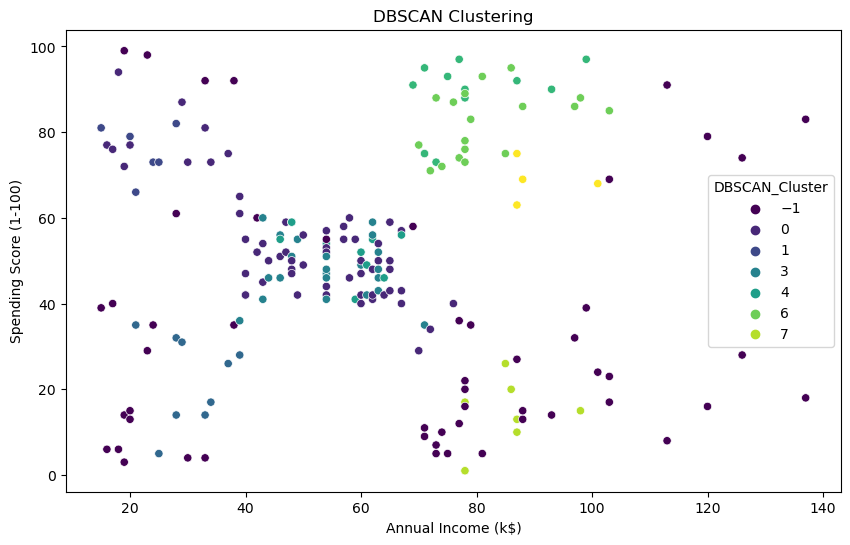

In [74]:
# DBSCAN Clustering with best eps value
from sklearn.cluster import DBSCAN

#Let's try now DBSCAN clustering on the same two features Spending Score and Annual Income
dbscan = DBSCAN(eps=.65, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()



### Comparison of K-Means and DBSCAN

#### Differences:

- **Approach:** K-Means is partition-based, while DBSCAN is density-based.
- **Parameter Requirements:** K-Means requires specifying "K" in advance, while DBSCAN adapts based on density.
- **Noise Handling:** DBSCAN can identify noise, whereas K-Means cannot.

#### Performance Evaluation:

We'll evaluate and compare the performance of both algorithms using the silhouette score metric.


In [76]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-Means
kmeans_score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_score}")

# Silhouette Score for DBSCAN
dbscan_score = silhouette_score(X_scaled, df['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_score}")


K-Means Silhouette Score: 0.3040600988258827
DBSCAN Silhouette Score: 0.14951185613328144


### Clustering Quality Assessment

#### Silhouette Scores:

- **K-Means Silhouette Score:** 0.30

  This score suggests a moderate clustering quality. It implies that the K-Means algorithm has formed clusters with moderate cohesion within each cluster and some separation between different clusters.

- **DBSCAN Silhouette Score:** 0.15

  This score indicates a lower clustering quality compared to K-Means. It suggests that the clusters formed by DBSCAN have less cohesion and/or are less separated from each other.

### Interpretation:

In general, silhouette scores range from -1 to 1:

- **Scores close to 1** indicate well-separated clusters.
- **Scores close to 0** indicate overlapping clusters or clusters with low cohesion.
- **Scores close to -1** indicate that samples may have been assigned to incorrect clusters.

The K-Means clustering seems to have performed better than DBSCAN in this case.

Now let's try the PCA Method to reduce dimensionality and see if we can improve our results. 

---
## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset, while retaining as much variance as possible. The method achieves this by identifying the directions (principal components) along which the data varies the most.

### Step 1: Data Centering

First, center the data by subtracting the mean from each feature:

$$
\mathbf{X}_{\text{centered}} = \mathbf{X} - \mathbf{\bar{X}}
$$

Where $\mathbf{X}$ is the original data matrix, and $\mathbf{\bar{X}}$ is a matrix where each column contains the mean of the corresponding feature from $\mathbf{X}$.

### Step 2: Covariance Matrix

Next, compute the covariance matrix of the centered data:

$$
\mathbf{C} = \frac{1}{n-1} \mathbf{X}_{\text{centered}}^\top \mathbf{X}_{\text{centered}}
$$

Where $n$ is the number of samples in the dataset.

### Step 3: Eigenvalue Decomposition

To find the principal components, perform an eigenvalue decomposition of the covariance matrix:

$$
\mathbf{C} \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

Where $\lambda_i$ are the eigenvalues, and $\mathbf{v}_i$ are the eigenvectors. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues correspond to the amount of variance captured by each component.

### Step 4: Sorting Eigenvectors

Sort the eigenvectors in descending order of their corresponding eigenvalues. The eigenvectors with the largest eigenvalues correspond to the directions that capture the most variance in the dataset.

### Step 5: Projecting Data

To reduce dimensionality, project the original data onto the top $k$ eigenvectors:

$$
\mathbf{X}_{\text{reduced}} = \mathbf{X}_{\text{centered}} \mathbf{V}_k
$$

Where $\mathbf{V}_k$ is a matrix formed from the top $k$ eigenvectors.

Thus, PCA provides a way to reduce the dimensionality of a dataset by transforming it into a new coordinate system defined by the principal components, while retaining as much variance as possible. This makes it easier to visualize, analyze, and process the data.


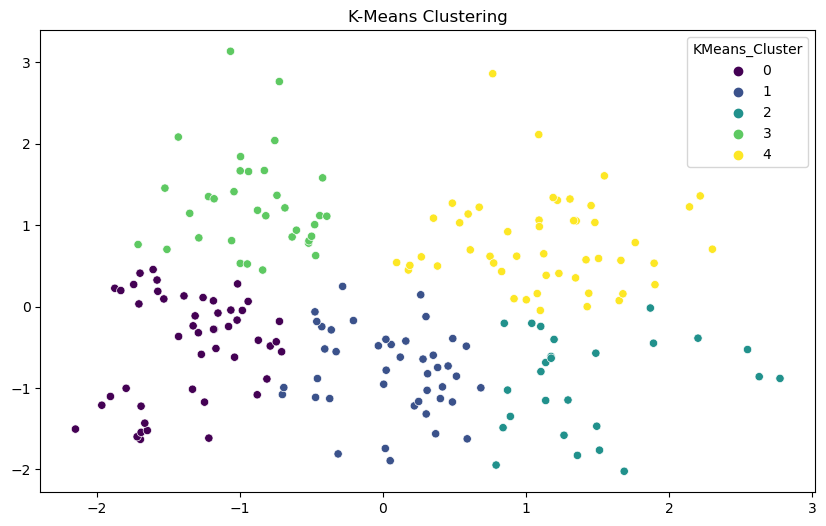

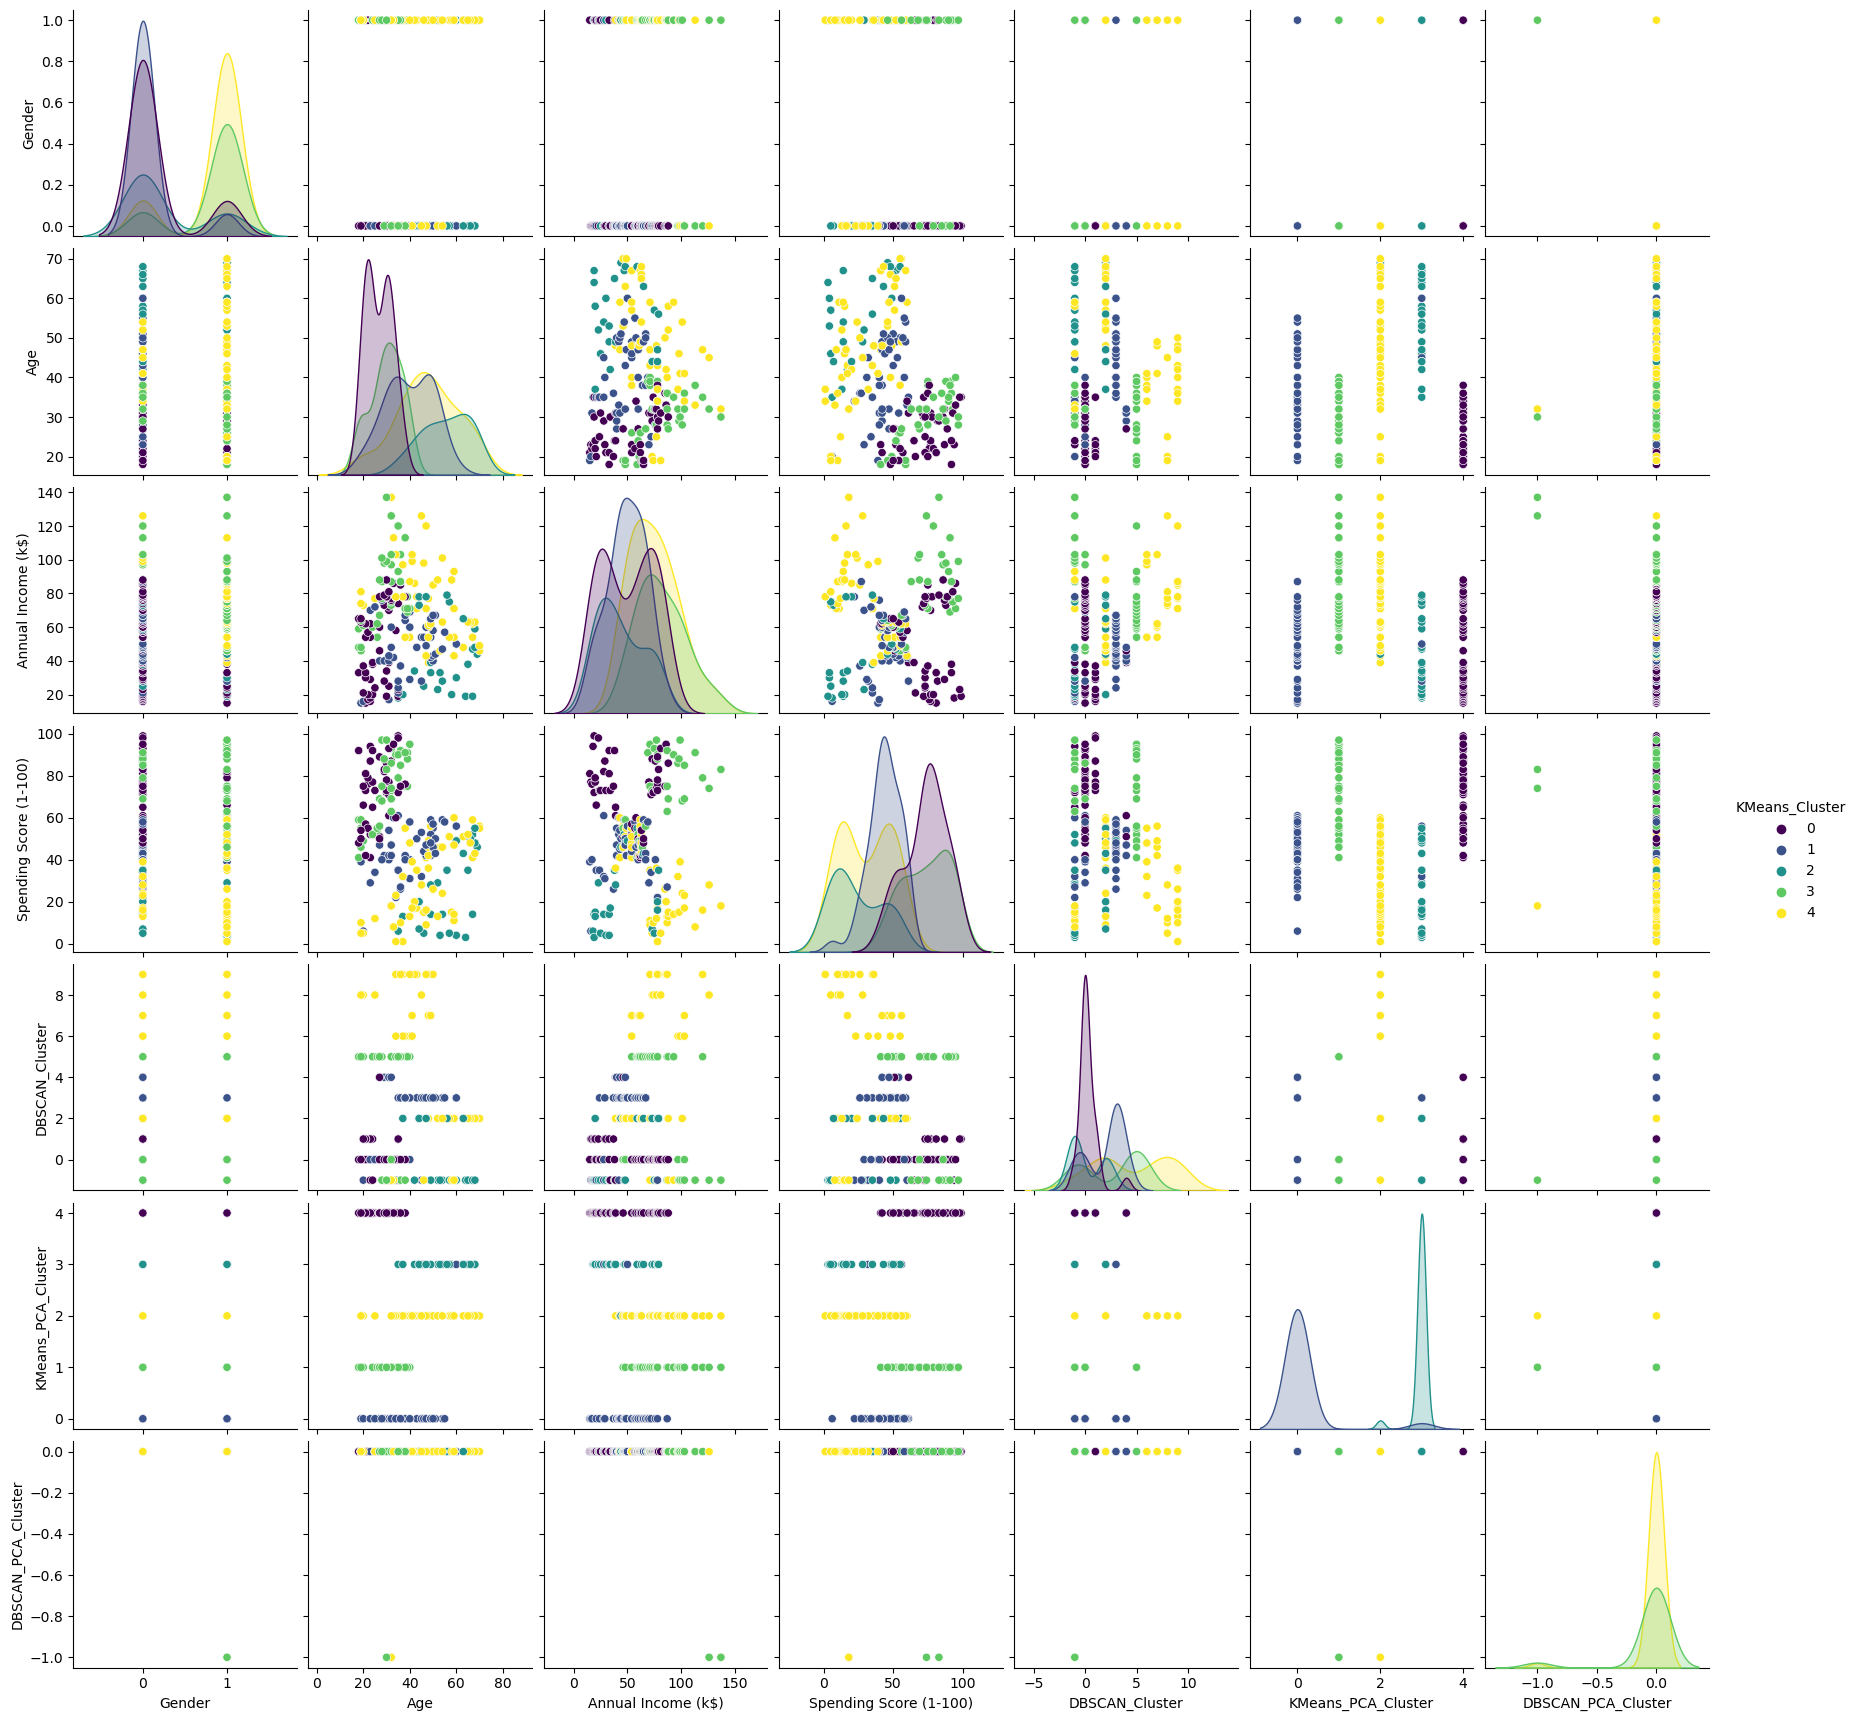

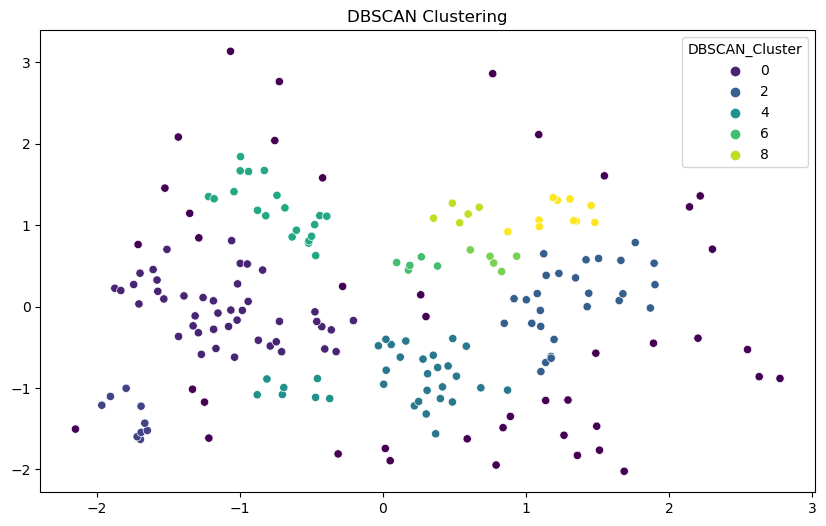

In [86]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], data=df, hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Pair Plot for K-Means Clustering
sns.pairplot(df, hue='KMeans_Cluster', palette='viridis')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=.3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_pca)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], data=df, hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


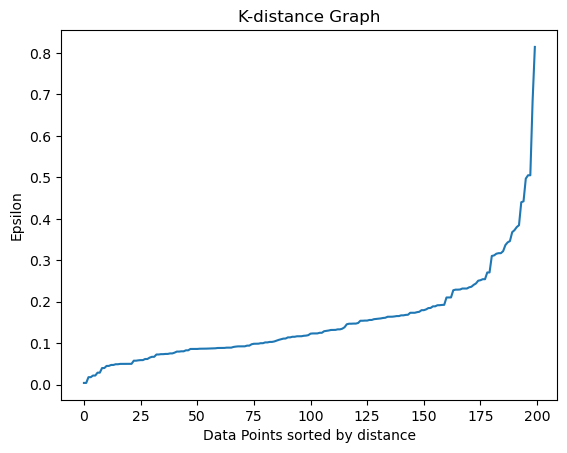

In [82]:
#Finding the best eps and n_samples values
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


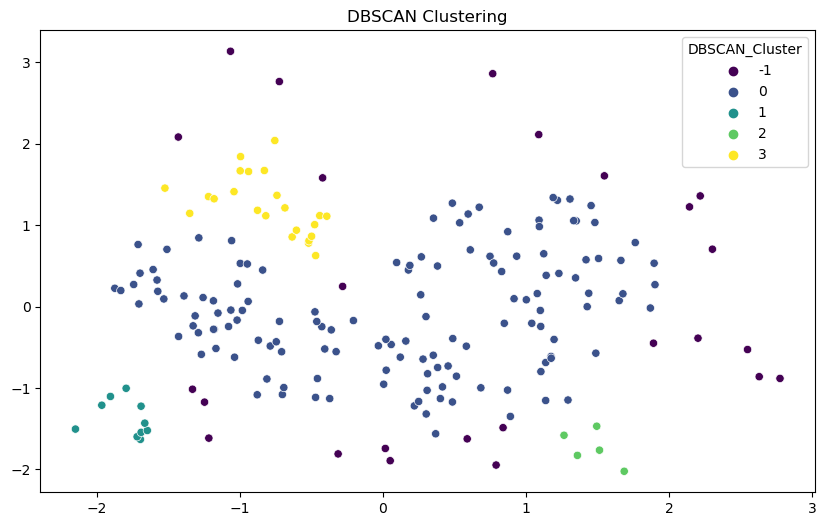

K-Means Silhouette Score: 0.3877934284115013
DBSCAN Silhouette Score: 0.04072702212666321


In [87]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=.36, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_pca)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], data=df, hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Silhouette Score for K-Means
kmeans_score = silhouette_score(X_pca, df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_score}")

# Silhouette Score for DBSCAN
dbscan_score = silhouette_score(X_pca, df['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_score}")


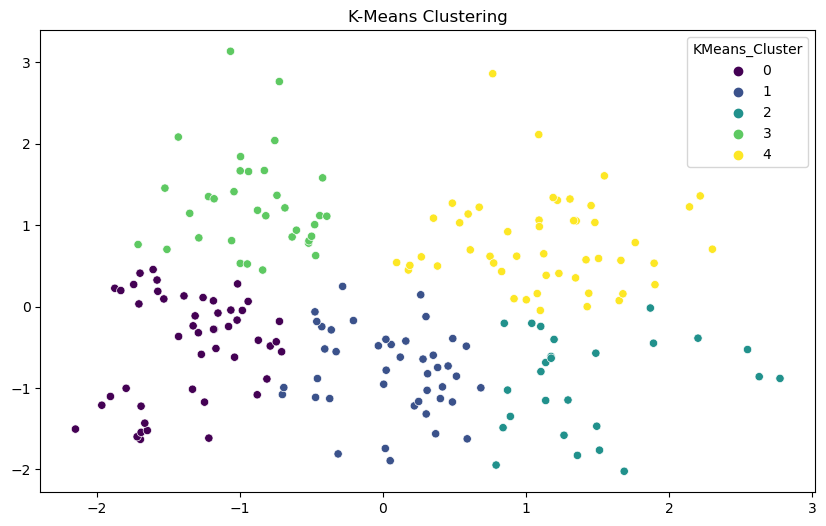

In [89]:
#Plotting again the K Means plot after PCA for reference and comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], data=df, hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

We can see how PCA has spectacularly improved the precision of the K Means Clustering to cluster all 5 regions of the data we had originally. This final clustering can be used by the marketing department to take decisions on what kind of campaign and who to address it to in their sales efforts. On the other hand we can see DBSCAN struggled in both cases since the densities of each of the clusters varies among them as this is one of their disadvantages. 

PCA is a valuable tool for dimensionality reduction, transforming datasets into new axes that capture key relationships. This simplifies data analysis, enables easier clustering, and reveals new patterns, making it an essential technique for various real-world applications. 

# Conclusion
Unsupervised learning is a powerful approach to machine learning that works with unlabeled data, discovering hidden patterns and structures. It provides valuable techniques such as clustering, dimensionality reduction, and anomaly detection, which are widely applicable across various domains.

By exploring the intrinsic relationships within a dataset, unsupervised learning helps uncover insights that drive data-driven decision-making, market segmentation, and data pre-processing. Despite challenges like parameter selection and interpretability, its adaptability and versatility make it an essential tool for modern data science.